In [1]:
from utility import *
from sklearn.cluster import MeanShift

PCA dataframes load 

In [2]:
dfs,y=load_PCA_dfs(200)

  0%|          | 0/10 [00:00<?, ?it/s]

Estimator

In [3]:
estimator=MeanShift(n_jobs=-1)

Tuning of bandwidth hyperparameter

In [4]:
#np.arange(0.1,5,0.1)

results,best_indexes,estimator2D=get_results(dfs,y,estimator,"bandwidth",np.arange(0.1,5,0.1))

Total result:   0%|          | 0/1 [00:00<?, ?it/s]

PCA_2:   0%|          | 0/49 [00:00<?, ?it/s]

In [5]:
results

{2:     bandwidth  rand index
 0         0.1    0.899650
 1         0.2    0.899275
 2         0.3    0.899073
 3         0.4    0.898452
 4         0.5    0.897838
 5         0.6    0.893956
 6         0.7    0.891586
 7         0.8    0.887954
 8         0.9    0.883730
 9         1.0    0.866104
 10        1.1    0.853532
 11        1.2    0.832779
 12        1.3    0.823079
 13        1.4    0.732332
 14        1.5    0.678995
 15        1.6    0.673249
 16        1.7    0.679419
 17        1.8    0.680655
 18        1.9    0.684779
 19        2.0    0.538857
 20        2.1    0.100254
 21        2.2    0.100254
 22        2.3    0.100254
 23        2.4    0.100254
 24        2.5    0.100254
 25        2.6    0.100254
 26        2.7    0.100254
 27        2.8    0.100254
 28        2.9    0.100254
 29        3.0    0.100254
 30        3.1    0.100254
 31        3.2    0.100254
 32        3.3    0.100254
 33        3.4    0.100254
 34        3.5    0.100254
 35        3.6    0.10025

In [6]:
results[2].iloc[best_indexes[2]]

bandwidth     0.10000
rand index    0.89965
Name: 0, dtype: float64

2D PCA plot

[[-3.50395863  1.88569137]
 [-2.85289668  0.98957055]
 [-2.95094555  0.94719851]
 ...
 [-3.7975571   1.79959332]
 [-3.8133891   2.16726395]
 [-3.87781926  1.47462702]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

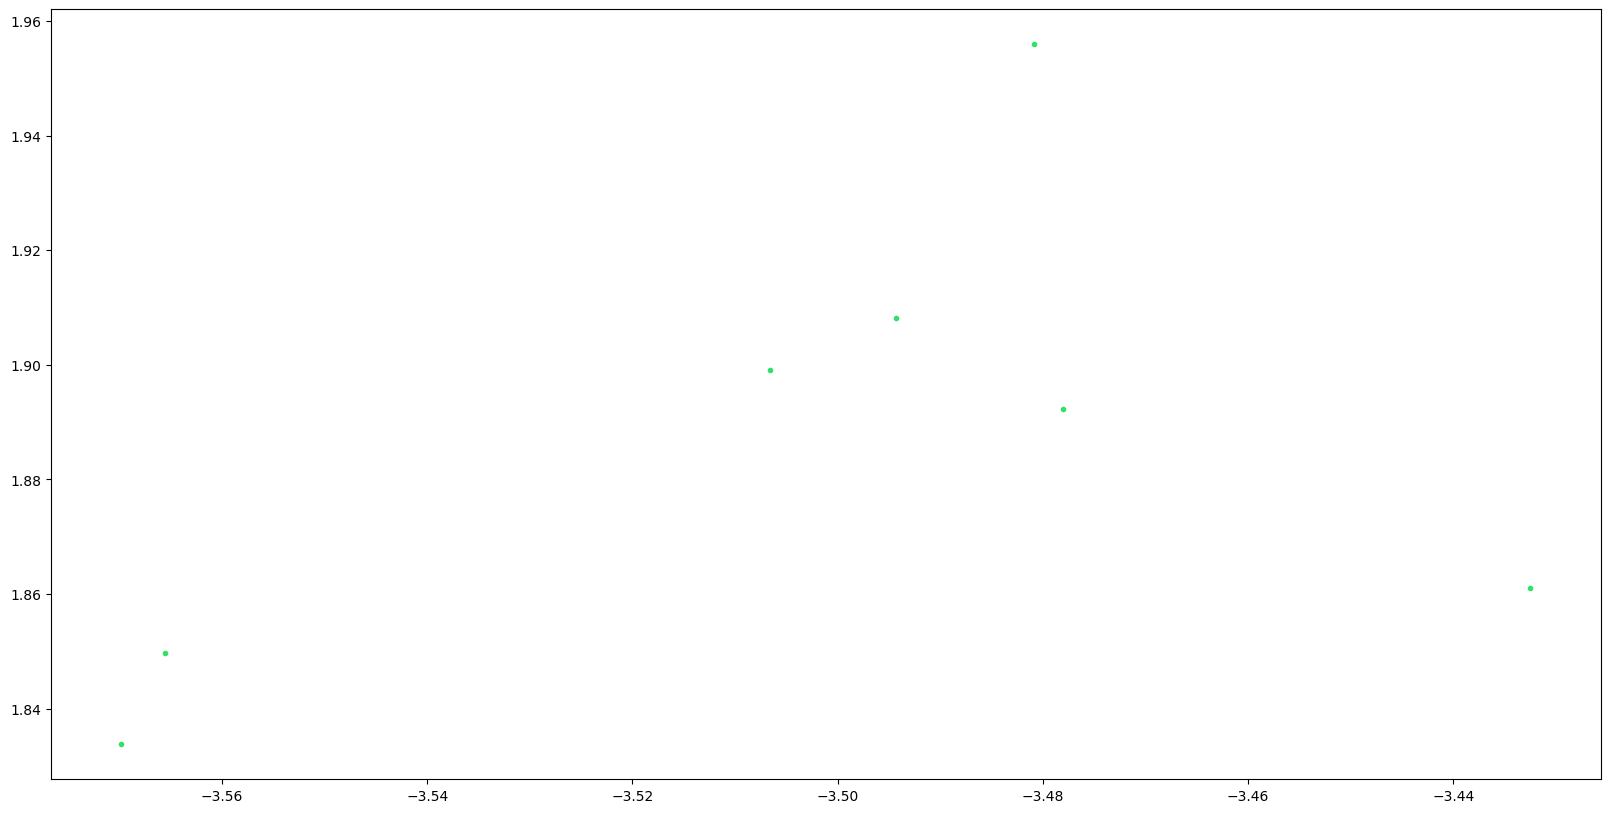

In [8]:
labels = estimator2D.labels_
cluster_centers = estimator2D.cluster_centers_

print(cluster_centers)

plot_clustering(dfs[2],labels,cluster_centers)